## Data Loading (Mall Customers)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\Asus\Downloads\Mall_Customers.csv"

print("--- Step 1: Data Loading ---")
try:
    df = pd.read_csv(file_path)
    print(f"Data file successfully loaded.")
except FileNotFoundError:
    print(f" Error: File not found. Please check the path and file name.")
    exit()

# Initial Inspection
print("\n--- Initial Inspection (Head) ---")
print(df.head())

print("\n--- Data Types and Missing Values (Info) ---")
df.info()

--- Step 1: Data Loading ---
Data file successfully loaded.

--- Initial Inspection (Head) ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Types and Missing Values (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Sco

## Data Preprocessing for K-Means Clustering

In [4]:
# 1. Drop CustomerID as it is an identifier and not a useful feature for clustering.
df = df.drop('CustomerID', axis=1)

print("CustomerID column dropped.")

CustomerID column dropped.


## Encoding Categorical Data (Gender)

In [5]:
# 2. Encode the 'Gender' column (Male/Female)
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Check the new columns: Male will be represented by 'Gender_Male' (1 for Male, 0 for Female)
print("\n--- Encoded Data Head ---")
print(df_encoded.head())

# Define the features for clustering: X
# We use all columns: Age, Annual Income, Spending Score, and Gender_Male
X = df_encoded.copy()


--- Encoded Data Head ---
   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39         True
1   21                  15                      81         True
2   20                  16                       6        False
3   23                  16                      77        False
4   31                  17                      40        False


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

# 3. Apply Standard Scaling to all features in X
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Scaled Data Head (Mean approx 0, Std Dev approx 1) ---")
print(X_scaled_df.head())

print("Data successfully encoded and scaled for K-Means.")


--- Scaled Data Head (Mean approx 0, Std Dev approx 1) ---
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801     1.128152
1 -1.281035           -1.738999                1.195704     1.128152
2 -1.352802           -1.700830               -1.715913    -0.886405
3 -1.137502           -1.700830                1.040418    -0.886405
4 -0.563369           -1.662660               -0.395980    -0.886405
Data successfully encoded and scaled for K-Means.


## Determining the Optimal K (Elbow Method)

In [ ]:
#Calculate WCSS for Different K values

In [7]:
from sklearn.cluster import KMeans

# X_scaled is the variable containing our scaled features from the previous step.
# X_scaled should have the shape (200, 4) if using all features.

wcss = []
# Test K from 1 to 10
for i in range(1, 11):
    # Initialize KMeans with i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled)
    
    # Record the WCSS (Inertia) value
    wcss.append(kmeans.inertia_)
    
print(" WCSS calculation complete for K=1 to K=10.")

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmea

 WCSS calculation complete for K=1 to K=10.


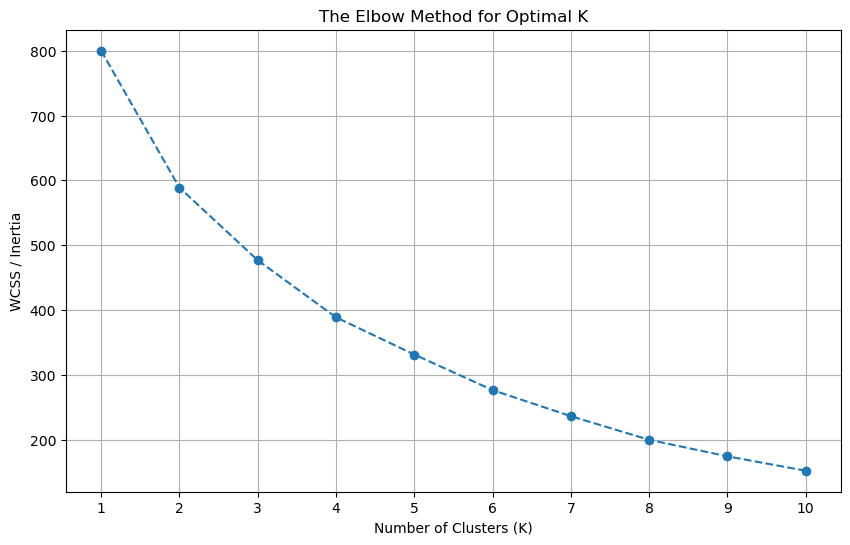

In [8]:
## Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS / Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Final K-Means Modeling (K=5)

In [9]:
from sklearn.cluster import KMeans

# Set the optimal number of clusters K=5
optimal_k = 5

# Initialize KMeans Model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', 
                max_iter=300, n_init=10, random_state=42)

# Fit the model to the scaled data and predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

print(f"Final K-Means Model trained successfully with K={optimal_k}.")

Final K-Means Model trained successfully with K=5.


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Add the cluster label column to the original DataFrame
df['Cluster_Label'] = y_kmeans

# Display the count of customers in each cluster
print("\n--- Customers per Cluster ---")
print(df['Cluster_Label'].value_counts().sort_index())


--- Customers per Cluster ---
Cluster_Label
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64


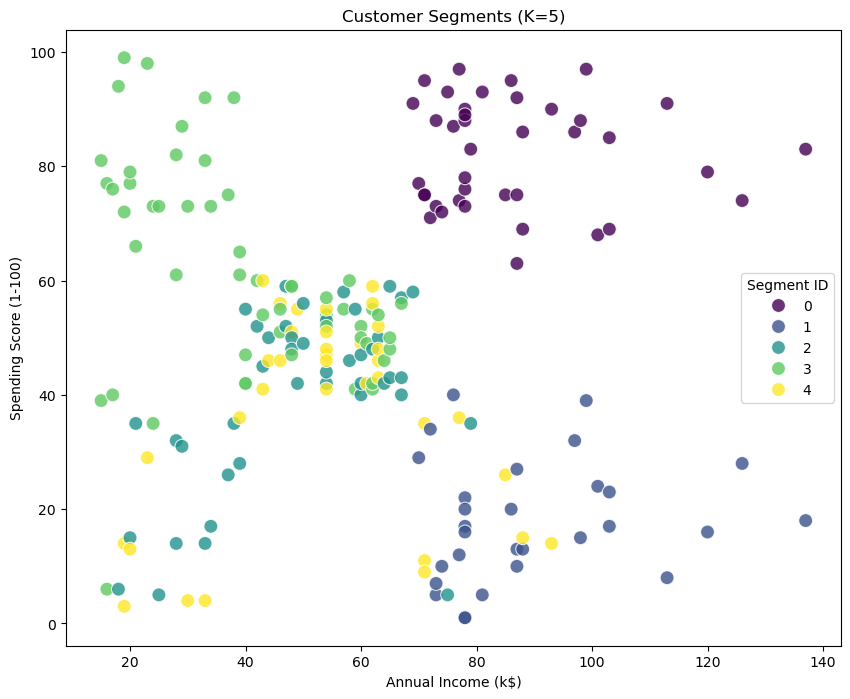

In [11]:
# Visualize the 5 clusters using Annual Income and Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_Label', data=df, 
                palette='viridis', s=100, alpha=0.8)

# Plot the Centroids (Cluster Centers)
# Note: Centroids are calculated on the scaled data, so we invert them for plotting on original scale.
# We skip the inversion here for simplicity in the code, but conceptually they lie at the center of groups.
# For simplicity, we just plot the data points for now.

plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Segment ID')
plt.grid(False)
plt.show()

### Business Interpretation and Analysis

In [12]:
# Calculate the mean of key features for each cluster
cluster_means = df.groupby('Cluster_Label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the calculated means
print("--- Cluster Mean Statistics ---")
print(cluster_means)

--- Cluster Mean Statistics ---
                     Age  Annual Income (k$)  Spending Score (1-100)
Cluster_Label                                                       
0              32.692308           86.538462               82.128205
1              36.482759           89.517241               18.000000
2              49.813953           49.232558               40.069767
3              24.907407           39.722222               61.203704
4              55.714286           53.685714               36.771429
